# MLP Forecaster Example

This notebook demonstrates how to use the MLPForecaster class to forecast time series data.

In [1]:
from aeon.datasets import load_airline

y = load_airline()

train_size = int(0.8 * len(y))
y_train, y_test = y[:train_size], y[train_size:]

In [2]:
from forecasting.deep_learning._mlp import MLPForecaster

forecaster = MLPForecaster(
    horizon=10,
    window_size=20,
    n_layers=3,
    batch_size=32,
    random_state=42
)

2025-03-28 01:20:21.092422: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 01:20:21.439600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-28 01:20:21.577307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-28 01:20:21.625007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 01:20:21.876805: I tensorflow/core/platform/cpu_feature_guar

In [3]:
forecaster.fit(y_train)

I0000 00:00:1743105034.047564   12306 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743105034.362964   12306 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743105034.363541   12306 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743105034.375402   12306 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743105034.375660   12306 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

MLPForecaster(horizon=10, random_state=42, window_size=20)

In [4]:
y_pred = forecaster.predict(y_test[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


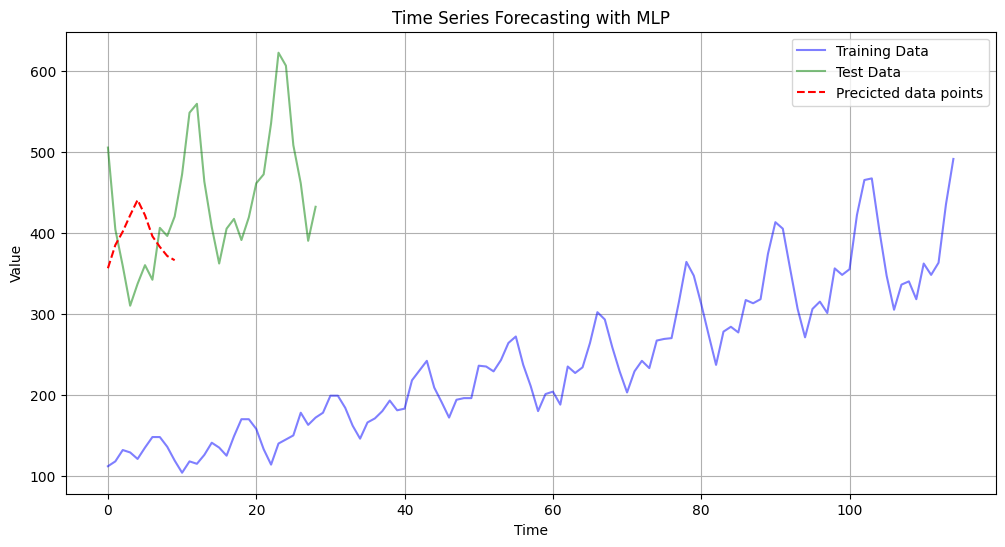

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(y_train, label="Training Data", color="blue", alpha=0.5)
plt.plot(y_test, label="Test Data", color="green", alpha=0.5)
plt.plot(y_pred, label="Precicted data points", color="red", linestyle="--")
plt.title("Time Series Forecasting with MLP")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Though the model is not very good, it is a good starting point for time series forecasting.